# Влияние функций активации на классификацию

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import random as python_random

In [6]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])

def classification_visualisation(xx, yy, classes):
  classes = classes.reshape(xx.shape)
  plt.figure()
  plt.pcolormesh(xx, yy, classes, cmap=cmap_light)
  plt.show()


def seed_random(seed=123):
  # The below is necessary for starting Numpy generated random numbers
  # in a well-defined initial state.
  np.random.seed(123)

  # The below is necessary for starting core Python generated random numbers
  # in a well-defined state.
  python_random.seed(123)

  # The below set_seed() will make random number generation
  # in the TensorFlow backend have a well-defined initial state.
  # For further details, see:
  # https://www.tensorflow.org/api_docs/python/tf/random/set_seed
  tf.random.set_seed(1234)

In [7]:
# создание обучающих данных
x1, x2 = np.meshgrid(np.linspace(-2, 2, 100),
                     np.linspace(-2, 2, 100))
train_X = np.c_[x1.ravel(), x2.ravel()]
train_y = train_X[:, 1] > np.sin(train_X [:, 0]*6)

In [8]:
train_X.shape, train_y.shape

((10000, 2), (10000,))

In [13]:
train_X[-1]

array([2., 2.])

In [14]:
train_y[-1]

True

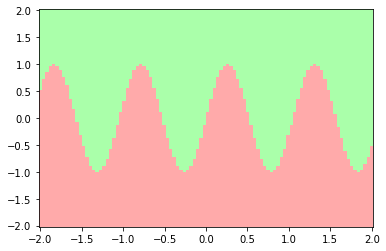

In [9]:
classification_visualisation(x1, x2, train_y)

создаем какую-нибудь модель

In [15]:
def model_experiment(model, seed=123):
  seed_random(seed)
  model.compile(loss='mse', optimizer='Adam')
  model.fit(train_X, train_y, epochs=50, batch_size=512, verbose=0)
  classification_visualisation(x1, x2, model.predict(train_X))

313/313 [==============================] - 1s 2ms/step


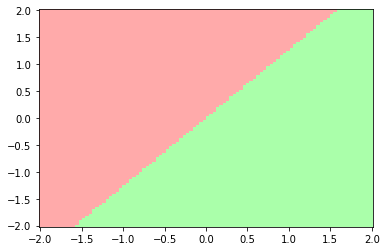

In [16]:
model = Sequential([
  Dense(1, activation='sigmoid', input_shape=(2,))
])

model_experiment(model)

313/313 [==============================] - 1s 2ms/step


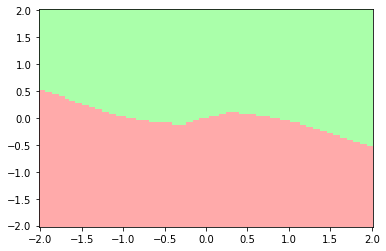

In [17]:
model = Sequential([
  Dense(200, activation='relu', input_shape=(2,)), 
  Dense(1, activation='sigmoid')
])

model_experiment(model)

313/313 [==============================] - 1s 3ms/step


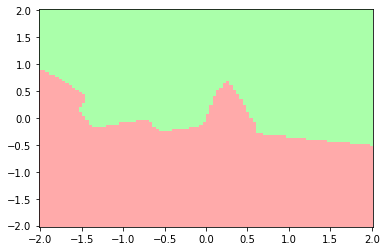

In [18]:
model = Sequential([
  Dense(5, activation='relu', input_shape=(2,)), 
  Dense(20, activation='relu'),
  Dense(20, activation='relu'),
  Dense(20, activation='relu'),
  Dense(1, activation='sigmoid')
])

model_experiment(model)

313/313 [==============================] - 1s 4ms/step


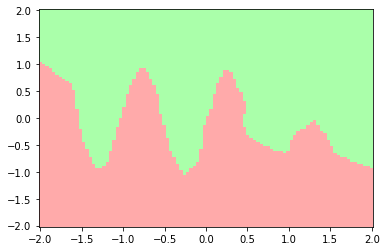

In [19]:
model = Sequential([
  Dense(5, activation='relu', input_shape=(2,)), 
  Dense(100, activation='relu'),
  Dense(100, activation='relu'),
  Dense(100, activation='relu'),
  Dense(1, activation='sigmoid')
])

model_experiment(model)

313/313 [==============================] - 1s 3ms/step


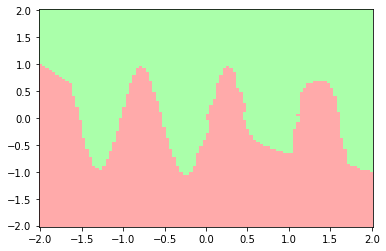

In [20]:
model = Sequential([
  Dense(5, activation='relu', input_shape=(2,)), 
  Dense(100, activation='relu'),
  Dense(500, activation='relu'),
  Dense(1000, activation='relu'),
  Dense(1, activation='sigmoid')
])

model_experiment(model)

313/313 [==============================] - 1s 4ms/step


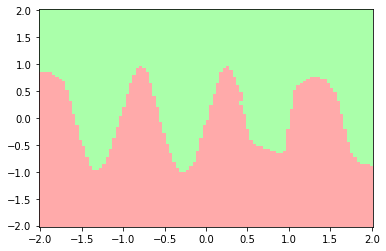

In [21]:
model = Sequential([
  Dense(5, activation='relu', input_shape=(2,)), 
  Dense(500, activation='relu'),
  Dense(500, activation='relu'),
  Dense(500, activation='relu'),
  Dense(500, activation='relu'),
  Dense(1, activation='sigmoid')
])

model_experiment(model)

# Смещение распределений во время обучения

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return x  *  (x  >  0)


def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

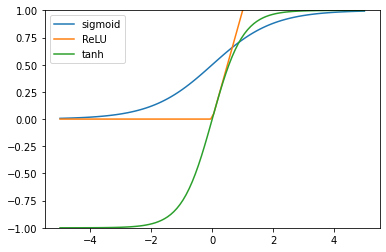

In [24]:
x = np.linspace(-5, 5, 100)

fig, ax = plt.subplots()
ax.plot(x, sigmoid(x), label='sigmoid')
ax.plot(x, ReLU(x), label='ReLU')
ax.plot(x, tanh(x), label='tanh')
ax.set_ylim(-1, 1)
ax.legend()

In [25]:
dist = np.random.normal(size=100000)

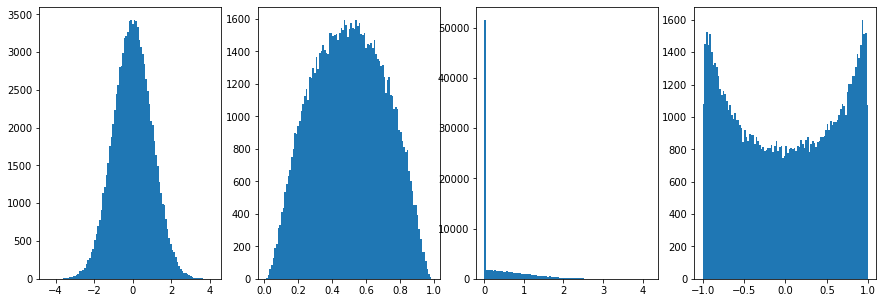

In [26]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
_ = axes[0].hist(dist, bins=100)
_ = axes[1].hist(sigmoid(dist), bins=100)
_ = axes[2].hist(ReLU(dist), bins=100)
_ = axes[3].hist(tanh(dist), bins=100)

In [35]:
def normalize(dist):
    return 2 * (dist - np.mean(dist))/np.std(dist) + 4

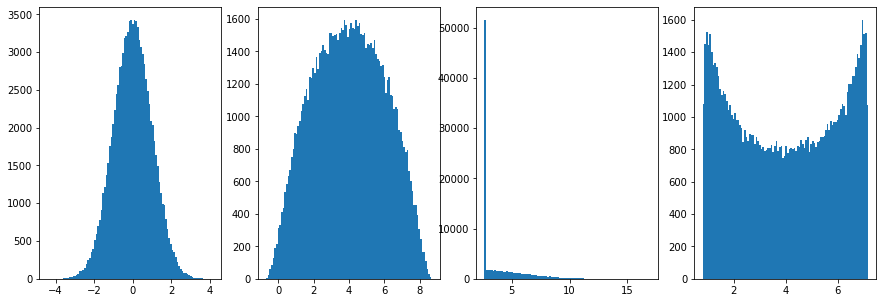

In [36]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
_ = axes[0].hist(dist, bins=100)
_ = axes[1].hist(normalize(sigmoid(dist)), bins=100)
_ = axes[2].hist(normalize(ReLU(dist)), bins=100)
_ = axes[3].hist(normalize(tanh(dist)), bins=100)

# TensorFlow

In [ ]:
!pip install tensorflow

In [37]:
import tensorflow as tf

print(tf.__version__)
msg = tf.constant('TensorFlow Hello World')
tf.print(msg)

2.9.1
TensorFlow Hello World


In [38]:
tf.test.is_built_with_cuda()

True

In [41]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [42]:
msg

<tf.Tensor: shape=(), dtype=string, numpy=b'TensorFlow Hello World'>

In [43]:
# создание тензора

A = tf.constant([[3, 2], 
                 [5, 2]], dtype='int32')

print(A)


tf.Tensor(
[[3 2]
 [5 2]], shape=(2, 2), dtype=int32)


In [44]:
# перевод тензора в объект numpy

A.numpy()

array([[3, 2],
       [5, 2]])

In [45]:
# конкатенация тензоров

B = tf.constant([[9, 5], 
                 [1, 3]])

AB = tf.concat(values=[A, B], axis=1)
print(AB.numpy())


[[3 2 9 5]
 [5 2 1 3]]


In [46]:
# сложение и вычитание тензоров
AB_sum = A + B
AB_dif = A - B

print(AB_sum)
print(AB_dif)

tf.Tensor(
[[12  7]
 [ 6  5]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[-6 -3]
 [ 4 -1]], shape=(2, 2), dtype=int32)


In [47]:
# изменение размерности

tensor = tf.constant([[3, 2], 
                      [5, 2], 
                      [9, 5], 
                      [1, 3]])

resh_tensor = tf.reshape(tensor = tensor, shape = [1, 8]) 

print(f'BEFORE {tensor.numpy()}')
print(f'AFTER {resh_tensor.numpy()}')

BEFORE [[3 2]
 [5 2]
 [9 5]
 [1 3]]
AFTER [[3 2 5 2 9 5 1 3]]


In [48]:
resh_tensor.numpy()

array([[3, 2, 5, 2, 9, 5, 1, 3]])

In [49]:
# поэлементное перемножение матриц

A = tf.constant([[3, 7], 
                 [1, 9]])


B = tf.constant([[5, 5],
                 [500, 500]])

AB = tf.multiply(A, B)
print(AB)

print(A*B)

tf.Tensor(
[[  15   35]
 [ 500 4500]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[  15   35]
 [ 500 4500]], shape=(2, 2), dtype=int32)


In [50]:
# матричное умножение 

A = tf.constant([[3, 7], 
                 [1, 9]])


B = tf.constant([[5, 5],
                 [500, 500]])

AB = tf.matmul(A, B)
print(AB)

print(A@B)

tf.Tensor(
[[3515 3515]
 [4505 4505]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[3515 3515]
 [4505 4505]], shape=(2, 2), dtype=int32)


# Fashion mnist

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.9.1


## Данные

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
print(train_images.shape, len(train_labels), train_labels, sep='\n')

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


In [7]:
print(test_images.shape, len(test_labels), test_labels, sep='\n')


(10000, 28, 28)
10000
[9 2 1 ... 8 1 5]


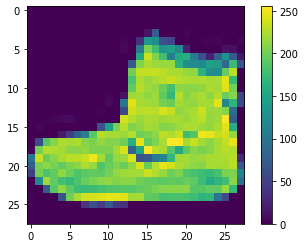

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0


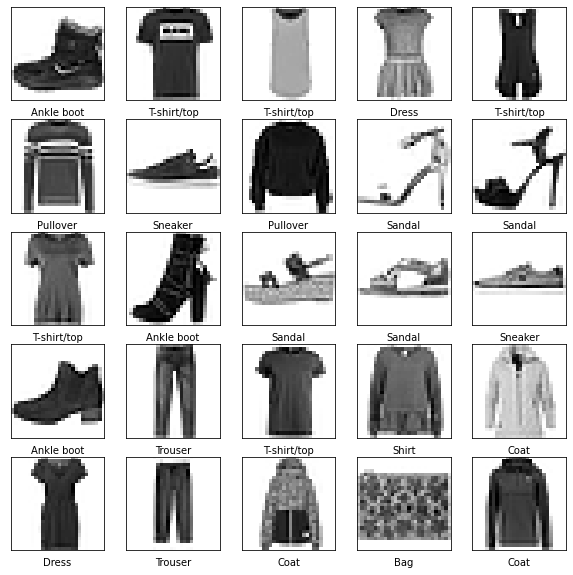

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Обучение

In [18]:
import sys
sys.executable

'C:\\Users\\Pirozhok\\Documents\\geekbrains\\введение в нейронные сети\\venv\\Scripts\\python.exe'

In [11]:
!python -m pip install pip --upgrade

^C


In [12]:
!pip install graphviz

^C


In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', 
                       kernel_regularizer=tf.keras.regularizers.L2(l2=100),
                       bias_regularizer=tf.keras.regularizers.L2(l2=0.5)),
    keras.layers.Dropout(0.1),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10)
])

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_5 (Batc  (None, 64)               256       
 hNormalization)                                      

In [15]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [19]:
boundaries = [2000, 4000]
values = [0.01, 0.005, 0.001]
lr_schedule = keras.optimizers.schedules.PiecewiseConstantDecay(boundaries, values)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
hstr = model.fit(train_images, train_labels, epochs=3, verbose=2)

Epoch 1/3
1875/1875 - 23s - loss: 12.5590 - accuracy: 0.3919 - 23s/epoch - 12ms/step
Epoch 2/3
1875/1875 - 20s - loss: 7.5821 - accuracy: 0.4577 - 20s/epoch - 10ms/step
Epoch 3/3
1875/1875 - 21s - loss: 3.8357 - accuracy: 0.5482 - 21s/epoch - 11ms/step


In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [35]:
hstr = model.fit(train_images, train_labels, epochs=3, verbose=1)

Epoch 1/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4946 - accuracy: 0.8245
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3738 - accuracy: 0.8642
Epoch 3/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3343 - accuracy: 0.8775


In [23]:
hstr.params

{'verbose': 2, 'epochs': 3, 'steps': 1875}

In [28]:
hstr.history

{'loss': [0.4966236650943756, 0.37450265884399414, 0.3359231650829315],
 'accuracy': [0.8242166638374329, 0.8657833337783813, 0.8779666423797607]}

In [29]:
hstr.model

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


## Результаты

In [36]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [37]:
model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


array([[ -4.774314  , -11.245442  ,  -8.6298485 , ...,   0.9991852 ,
         -4.8844204 ,   5.330208  ],
       [ -0.6374368 , -13.078291  ,  11.488208  , ..., -16.306194  ,
         -4.829952  , -12.76405   ],
       [  1.0361093 ,  12.043759  ,  -1.8882664 , ..., -12.312604  ,
         -6.0303392 , -13.138846  ],
       ...,
       [ -2.189509  , -11.667041  ,  -2.7904623 , ..., -10.60856   ,
          4.069779  , -13.479198  ],
       [ -2.6385443 ,   9.45051   ,  -4.150861  , ...,  -8.3711405 ,
         -7.3770037 ,  -4.778248  ],
       [ -3.788652  ,  -9.805147  ,  -4.2979207 , ...,   0.28896812,
         -1.7399911 ,  -3.2316484 ]], dtype=float32)

In [38]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [39]:
print(predictions[0],
      np.argmax(predictions[0]),
      test_labels[0],
      sep='\n')

[4.0053401e-05 6.1981844e-08 8.4762161e-07 3.5433501e-07 1.3091550e-06
 7.5777448e-03 2.1092714e-05 1.2883628e-02 3.5877387e-05 9.7943908e-01]
9
9


## Визуализация

In [41]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 41ms/step
[[5.3526742e-06 2.1118692e-11 9.8809087e-01 9.2395949e-09 6.3655095e-04
  2.1922970e-11 1.1267130e-02 8.3962340e-13 8.0870542e-08 2.8991412e-11]]


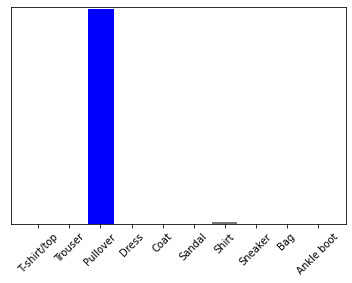

In [42]:
img = test_images[1]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = probability_model.predict(img)

print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

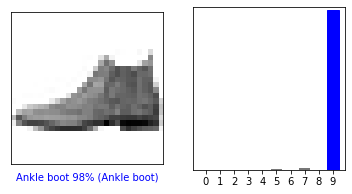

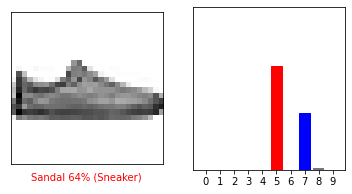

In [43]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


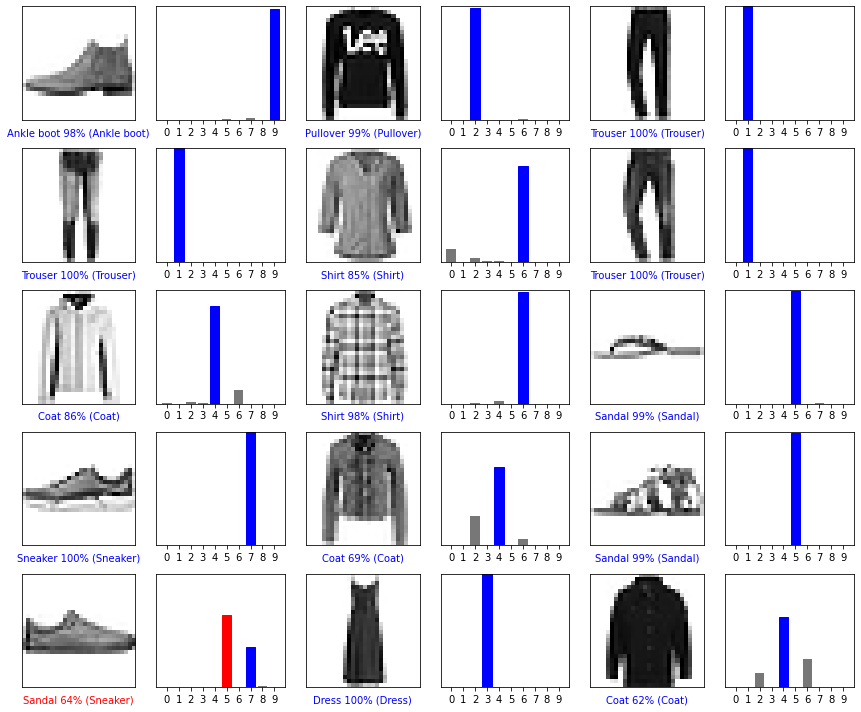

In [45]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


# Домашнее задание

# Датасет с винами

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [ ]:
data = load_wine()

In [ ]:
list(data.target_names)

In [ ]:
data.feature_names

In [ ]:
data.data.shape, data.target.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, shuffle=True, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Датасет с рукописными буквами

https://www.tensorflow.org/datasets/catalog/binary_alpha_digits

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [46]:
classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [47]:
len(classes)

36

In [ ]:
classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
print(classes)

X = np.load('binary_alpha_digits_images.npy')
Y = np.load('binary_alpha_digits_labels.npy')

In [49]:
len(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))

26

In [ ]:
X.shape, y.shape

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(10, 5))
fig.suptitle('binary alpha digits', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(X[n], cmap=plt.cm.binary)
    ax.set_xlabel(classes[y[n]])
    n += 1